In [27]:
import random

import pandas as pd
import os

os.chdir(r"C:\Users\hp\Desktop\TM")
train=pd.read_csv("train1.csv", header = None, names=["Cause","Title Case","Summary Case"])
test=pd.read_csv("test1.csv", header = None, names=["Cause","Title Case","Summary Case"])


In [2]:
#Summarize the data by the news class
train.groupby('Cause').describe()


Summary Case         \
                                 count unique   
Cause                                           
Caught in/between Objects           29     29   
Collapse of object                  12     12   
Electrocution                       17     17   
Falls                               53     53   
Other                               27     27   
Struck By Moving Objects            44     43   

                                                                              \
                                                                         top   
Cause                                                                          
Caught in/between Objects  Victim's head was caught between Frame Cage an...   
Collapse of object         The trench wall collapsed and buried the victi...   
Electrocution              Victim was electrocuted while doing service li...   
Falls                      The victim had fallen down as the floor he ste...   
Other                      During the incident, the victim together with ...   
Struck By Moving Objects   Victim and his colleague was assigned to cutti...   

                               Title Case         \
                          freq      count unique   
Cause                                              
Caught in/between Objects    1         29     28   
Collapse of object           1         12     12   
Electrocution                1         17      8   
Falls                        1         53     20   
Other                        1         27     22   
Struck By Moving Objects     2         44     41   

                                                                           
                                                                 top freq  
Cause                                                                      
Caught in/between Objects                Died caught between objects    2  
Collapse of object         Three died due to concrete wall collapsed    1  
Electrocution                              Died due to electrocution    4  
Falls                                       Died falling from height   31  
Other                                           Died due to drowning    6  
Struck By Moving Objects                        Died crushed by tree    2

In [3]:
#Count the length of each document
length=train['Summary Case'].apply(len)
train=train.assign(Length=length)
length

0      288
1      173
2      251
3       73
4       91
5       76
6      264
7      100
8      178
9      339
10      45
11     169
12     173
13      81
14      61
15     117
16     188
17      85
18     179
19     213
20     122
21     323
22     214
23     183
24     286
25     293
26     132
27     117
28     169
29     170
      ... 
152    116
153    206
154    104
155    199
156    120
157    198
158    275
159    328
160    188
161    284
162    135
163    232
164    185
165    144
166    206
167    295
168    251
169    275
170    269
171    248
172    120
173    274
174    222
175    289
176    247
177    227
178    177
179    263
180    479
181    546
Name: Summary Case, Length: 182, dtype: int64

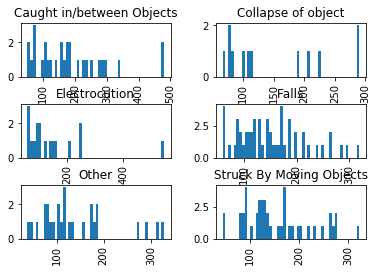

In [4]:
#Plot the distribution of the document length for each category
import matplotlib.pyplot as plt
train.hist(column='Length',by='Cause',bins=50)

plt.show()


In [5]:
#Define preprocessing function

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
newstopwords=stopwords.words("English") + ['the','is','it','may','was']#,'victim','victims','employee']
WNlemma = nltk.WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[A-Za-z_\']+')
snowball = nltk.SnowballStemmer('english')


def pre_process(text):
    tokens = nltk.word_tokenize(text)
    tokens = tokenizer.tokenize(text)
    tokens = [t.lower() for t in tokens]
    tokens=[word for word in tokens if word not in newstopwords]
    tokens = [ snowball.stem(t) for t in tokens ]
#    tokens=[WNlemma.lemmatize(t) for t in tokens]
#    tokens=[word for word in tokens if word not in newstopwords]
    text_after_process=" ".join(tokens)
    return(text_after_process)

In [6]:
#Apply the function on each document
train['Summary Case'] = train['Summary Case'].apply(pre_process)
test['Summary Case'] = test['Summary Case'].apply(pre_process)

In [7]:
# #split the data into training and testing
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(subnews.Text, subnews.Class, test_size=0.33, random_state=12)
# ## x,y,33-67%split, seed

In [8]:
X_train = train['Summary Case']
X_test = test['Summary Case']
y_train = train['Cause']
y_test = test['Cause']

In [9]:
#Create dtm by using word occurence

from sklearn.feature_extraction.text import CountVectorizer


count_vect = CountVectorizer( )

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

##in the o/p (x,y) is the row,col of the matrix

(182, 682)

In [10]:
count_vect.get_feature_names()

['access',
 'accid',
 'accident',
 'accompani',
 'accord',
 'action',
 'activ',
 'adjust',
 'admit',
 'advertis',
 'afternoon',
 'afterward',
 'age',
 'air',
 'alight',
 'alleg',
 'alon',
 'along',
 'aluminium',
 'aluminum',
 'ambulan',
 'ampuan',
 'anoth',
 'approxim',
 'arailway',
 'arch',
 'area',
 'arm',
 'around',
 'arrang',
 'arriv',
 'ash',
 'assign',
 'assist',
 'attempt',
 'atth',
 'avalanch',
 'away',
 'back',
 'backho',
 'backward',
 'bad',
 'bag',
 'bakho',
 'balanc',
 'balconi',
 'bank',
 'bar',
 'barg',
 'batch',
 'bay',
 'beam',
 'began',
 'behind',
 'believ',
 'belt',
 'bind',
 'bleed',
 'block',
 'board',
 'bodi',
 'boiler',
 'bottom',
 'box',
 'boy',
 'brain',
 'brake',
 'branch',
 'break',
 'brick',
 'bring',
 'broke',
 'broken',
 'brought',
 'bucket',
 'buffalo',
 'build',
 'bulldoz',
 'bundl',
 'buri',
 'burn',
 'bus',
 'cabin',
 'cabl',
 'cage',
 'came',
 'canal',
 'car',
 'care',
 'carri',
 'catod',
 'caught',
 'caus',
 'chain',
 'chanc',
 'chang',
 'check',
 'ch

In [11]:
dtm1 = pd.DataFrame(X_train_counts.toarray().transpose(), index = count_vect.get_feature_names())
dtm1=dtm1.transpose()
dtm1.head()
#dtm1.to_csv('dtm1.csv',sep=',')

,access,accid,accident,accompani,accord,action,activ,adjust,admit,advertis,...,within,without,wood,work,worker,workplac,worn,wrap,wrong,year
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Create dtm by using Term Frequency. 
#Divide the number of occurrences of each word in a document 
#by the total number of words in the document: 
#these new features are called tf for Term Frequencies
#If set use_idf=True, which mean create dtm by using tf_idf

from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_train_tf.shape

(182, 682)

In [13]:
#Building Modeling by using Naïve Bayes
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn import metrics 

clf = MultinomialNB().fit(X_train_tf, y_train)

from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),  
                     ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
                    ])

text_clf.fit(X_train,y_train ) 

predicted = text_clf.predict(X_test)
#np.mean(predicted == y_test) 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[ 0  0  0  3  0  2]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0 14  0  2]
 [ 0  0  0 10  0  0]
 [ 0  0  0  2  0 16]]
0.566037735849


In [14]:
#Decision Tree

random.seed(100)

from sklearn import tree
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', tree.DecisionTreeClassifier())
                    ])
text_clf.fit(X_train, y_train) 
predicted = text_clf.predict(X_test)

print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[ 2  0  0  1  1  1]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  1  0]
 [ 3  0  0  9  0  4]
 [ 0  0  0  0 10  0]
 [ 2  0  1  1  4 10]]
0.622641509434


In [15]:
#SVM

random.seed(50)


from sklearn.svm import LinearSVC
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))
                    ])

text_clf.fit(X_train, y_train) 

predicted = text_clf.predict(X_test)
 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[ 4  0  0  0  0  1]
 [ 0  1  0  1  1  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0 12  0  4]
 [ 2  0  1  1  5  1]
 [ 2  0  0  0  1 15]]
0.698113207547


In [45]:
random.seed(100)

from sklearn.linear_model import SGDClassifier
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer(use_idf=True)),
                      ('clf', SGDClassifier(
                                            alpha=1e-2 
                                             ))
                    ])

text_clf.fit(X_train, y_train)
predicted = text_clf.predict(X_test)
 
print(metrics.confusion_matrix(y_test, predicted))
print(np.mean(predicted == y_test) )

[[ 3  0  0  0  0  2]
 [ 0  1  0  1  1  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0 13  0  3]
 [ 0  0  2  2  5  1]
 [ 1  0  0  0  1 16]]
0.716981132075


In [46]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 3  0  0  0  0  2]
 [ 0  1  0  1  1  0]
 [ 0  0  0  0  0  1]
 [ 0  0  0 13  0  3]
 [ 0  0  2  2  5  1]
 [ 1  0  0  0  1 16]]


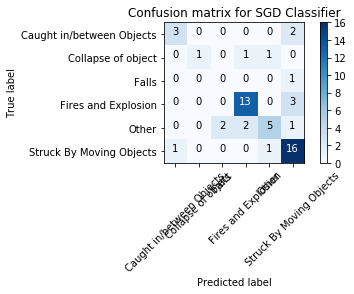

Accuracy= 0.716981132075


In [54]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
#cnf_matrix = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cnf_matrix, classes=['Caught in/between Objects','Collapse of object','Falls','Fires and Explosion','Other','Struck By Moving Objects'],
                      title='Confusion matrix for SGD Classifier')
#plt.figure()
plt.show()
print("Accuracy=", np.mean(predicted == y_test) )

In [18]:
print(metrics.classification_report(y_test, predicted))

                           precision    recall  f1-score   support

Caught in/between Objects       0.75      0.60      0.67         5
       Collapse of object       1.00      0.33      0.50         3
            Electrocution       0.00      0.00      0.00         1
                    Falls       0.76      0.81      0.79        16
                    Other       0.67      0.40      0.50        10
 Struck By Moving Objects       0.76      0.89      0.82        18

              avg / total       0.74      0.70      0.70        53



In [30]:
osha=pd.read_csv("osha.csv", header = None, names=["id","Title Case","Summary Case","a","b"])
osha['Summary Case'] = osha['Summary Case'].apply(pre_process)
pred_osha=osha['Summary Case']

In [32]:
predicted = text_clf.predict(pred_osha)

In [33]:
predicted

array(['Struck By Moving Objects', 'Falls', 'Struck By Moving Objects',
       ..., 'Struck By Moving Objects', 'Falls', 'Other'], 
      dtype='<U25')

<bound method Counter.most_common of FreqDist({'Struck By Moving Objects': 6459, 'Falls': 5821, 'Caught in/between Objects': 1605, 'Electrocution': 998, 'Other': 935, 'Collapse of object': 149})>


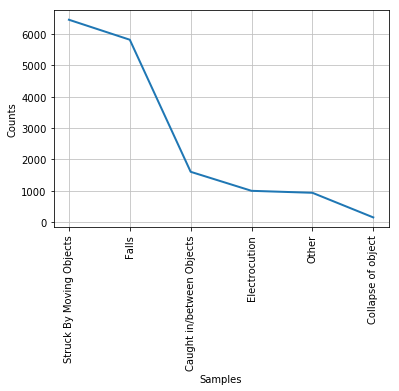

In [36]:
from nltk import FreqDist

freq_causes=FreqDist(predicted)
print(freq_causes.most_common)
fd_num = FreqDist(freq_causes)
fd_num.plot()